# Practical 2

## Aim : Applying and demonstrating Factor Analysis on bfi.csv dataset

In [1]:
#importing the libraries
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(R"D:\AML\Datasets\bfi.csv")  #dataset

In [3]:
df.columns

Index(['Unnamed: 0', 'A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'E1', 'E2', 'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1',
       'O2', 'O3', 'O4', 'O5', 'gender', 'education', 'age'],
      dtype='object')

In [4]:
df.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [5]:
df.drop(['Unnamed: 0','gender', 'education', 'age'],axis=1,inplace=True)  #deleting the unnecessary columns

In [6]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

In [7]:
df.isnull().sum()  #checking the null values

A1    16
A2    27
A3    26
A4    19
A5    16
C1    21
C2    24
C3    20
C4    26
C5    16
E1    23
E2    16
E3    25
E4     9
E5    21
N1    22
N2    21
N3    11
N4    36
N5    29
O1    22
O2     0
O3    28
O4    14
O5    20
dtype: int64

In [8]:
df.dropna(inplace=True)  #deleting null values

In [9]:
df.isnull().sum()

A1    0
A2    0
A3    0
A4    0
A5    0
C1    0
C2    0
C3    0
C4    0
C5    0
E1    0
E2    0
E3    0
E4    0
E5    0
N1    0
N2    0
N3    0
N4    0
N5    0
O1    0
O2    0
O3    0
O4    0
O5    0
dtype: int64

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity  #finding chi square value and p value
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577235317, 0.0)

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo  #Kaiser-Meyer-Olkin (KMO) Test
kmo_all,kmo_model=calculate_kmo(df)

In [12]:
kmo_model

0.8486452309468386

In [13]:
fa = FactorAnalyzer() #Choosing the Number of Factors
fa.fit(df)
eigen_values, vectors = fa.get_eigenvalues()
eigen_values

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

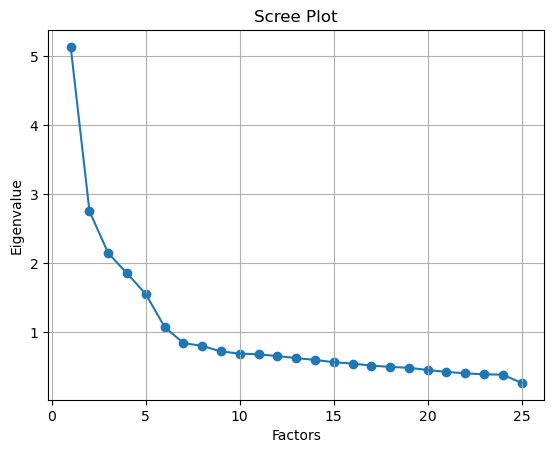

In [14]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),eigen_values)
plt.plot(range(1,df.shape[1]+1),eigen_values)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [15]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [16]:
fa.loadings_

array([[ 9.52197423e-02,  4.07831588e-02,  4.87338859e-02,
        -5.30987350e-01, -1.13057330e-01,  1.61216357e-01],
       [ 3.31312759e-02,  2.35538038e-01,  1.33714394e-01,
         6.61140976e-01,  6.37337875e-02, -6.24353721e-03],
       [-9.62088410e-03,  3.43008171e-01,  1.21353367e-01,
         6.05932698e-01,  3.39902659e-02,  1.60106428e-01],
       [-8.15175587e-02,  2.19716719e-01,  2.35139532e-01,
         4.04594040e-01, -1.25338019e-01,  8.63557031e-02],
       [-1.49615885e-01,  4.14457671e-01,  1.06382165e-01,
         4.69698293e-01,  3.09765735e-02,  2.36519342e-01],
       [-4.35840231e-03,  7.72477516e-02,  5.54582255e-01,
         7.51069673e-03,  1.90123730e-01,  9.50350461e-02],
       [ 6.83300836e-02,  3.83703824e-02,  6.74545451e-01,
         5.70549885e-02,  8.75925915e-02,  1.52775079e-01],
       [-3.99936735e-02,  3.18673001e-02,  5.51164439e-01,
         1.01282241e-01, -1.13380873e-02,  8.99628347e-03],
       [ 2.16283365e-01, -6.62407748e-02, -6.384

In [17]:
factor_df=pd.DataFrame(fa.loadings_,index=df.columns)
print(factor_df)

           0         1         2         3         4         5
A1  0.095220  0.040783  0.048734 -0.530987 -0.113057  0.161216
A2  0.033131  0.235538  0.133714  0.661141  0.063734 -0.006244
A3 -0.009621  0.343008  0.121353  0.605933  0.033990  0.160106
A4 -0.081518  0.219717  0.235140  0.404594 -0.125338  0.086356
A5 -0.149616  0.414458  0.106382  0.469698  0.030977  0.236519
C1 -0.004358  0.077248  0.554582  0.007511  0.190124  0.095035
C2  0.068330  0.038370  0.674545  0.057055  0.087593  0.152775
C3 -0.039994  0.031867  0.551164  0.101282 -0.011338  0.008996
C4  0.216283 -0.066241 -0.638475 -0.102617 -0.143846  0.318359
C5  0.284187 -0.180812 -0.544838 -0.059955  0.025837  0.132423
E1  0.022280 -0.590451  0.053915 -0.130851 -0.071205  0.156583
E2  0.233624 -0.684578 -0.088497 -0.116716 -0.045561  0.115065
E3 -0.000895  0.556774  0.103390  0.179396  0.241180  0.267291
E4 -0.136788  0.658395  0.113798  0.241143 -0.107808  0.158513
E5  0.034490  0.507535  0.309813  0.078804  0.200821  0

In [18]:
fa = FactorAnalyzer(n_factors=5,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

In [19]:
factor_df=pd.DataFrame(fa.loadings_,index=df.columns)
print(factor_df)

           0         1         2         3         4
A1  0.111126  0.040465  0.022798 -0.428166 -0.077931
A2  0.029588  0.213716  0.139037  0.626946  0.062139
A3  0.009357  0.317848  0.109331  0.650743  0.056196
A4 -0.066476  0.204566  0.230584  0.435624 -0.112700
A5 -0.122113  0.393034  0.087869  0.537087  0.066708
C1  0.010416  0.070184  0.545824  0.038878  0.209584
C2  0.089574  0.033270  0.648731  0.102782  0.115434
C3 -0.030855  0.023907  0.557036  0.111578 -0.005183
C4  0.240410 -0.064984 -0.633806 -0.037498 -0.107535
C5  0.290318 -0.176395 -0.562467 -0.047525  0.036822
E1  0.042819 -0.574835  0.033144 -0.104813 -0.058795
E2  0.244743 -0.678731 -0.102483 -0.112517 -0.042010
E3  0.024180  0.536816  0.083010  0.257906  0.280877
E4 -0.115614  0.646833  0.102023  0.306101 -0.073422
E5  0.036145  0.504069  0.312899  0.090354  0.213739
N1  0.786807  0.078923 -0.045997 -0.216363 -0.084704
N2  0.754109  0.027301 -0.030568 -0.193744 -0.010304
N3  0.731721 -0.061430 -0.067084 -0.027712 -0.

In [20]:
fa.get_factor_variance()  # Get variance of each factors

(array([2.70963262, 2.47308982, 2.04110564, 1.844498  , 1.52215297]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))

In [21]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4
Variance          2.709633  2.473090  2.041106  1.844498  1.522153
Proportional Var  0.108385  0.098924  0.081644  0.073780  0.060886
Cumulative Var    0.108385  0.207309  0.288953  0.362733  0.423619


In [22]:
print(pd.DataFrame(fa.get_communalities(),index=df.columns,columns=['Communalities']))

    Communalities
A1       0.203905
A2       0.462803
A3       0.539692
A4       0.301905
A5       0.470020
C1       0.348395
C2       0.453872
C3       0.324289
C4       0.476699
C5       0.435383
E1       0.347809
E2       0.545502
E3       0.441055
E4       0.541257
E5       0.407146
N1       0.681398
N2       0.608003
N3       0.544475
N4       0.505803
N5       0.349316
O1       0.317339
O2       0.267452
O3       0.474643
O4       0.246035
O5       0.296284
